UE 4268 - MACHINE LEARNIG EF4 2

**`TCHEKOUNANG NJILA LESLIE MERCEDES`**, `19E2778` et `mercedes.tchekounang@facsciences-uy1.cm` 


Department of Physics - Faculty of Science - University of Yaoundé I

`PNR`

`28-04-2023`

# Evaluation formative 4 - Quantum Machine Learning

## Supervised learning

The basic structure of a supervised pattern recognition or prediction task can be formally defined as follows.

**Given an input domain $\mathcal{X}$ and an output domain $\mathcal{Y}$, a training data set $\mathcal{D} = \{(x^1,y^1),\ldots, (x^M,y^M)\}$ of training pairs $(x^m,y^m)\in\mathcal{X}\times\mathcal{Y}$ with $m = 1,\ldots, M$ of training inputs $x^m$ and target outputs $y^m$, as well as a new unclassified input $\tilde{x}\in\mathcal{X}$, guess or predict the corresponding output $\tilde{y}\in\mathcal{Y}$.**

The input domain $\mathcal{X}$ will mostly be chosen to be the space $\mathbb{R}^N$ of real N-dimensional vectors, or for binary variables, the space of N-bit binary strings $\{0, 1\}^N$. The input vectors are also called **feature vectors** as they represent information on carefully selected features of an instance. In cases where the raw data is not from a numerical domain or does not have an obvious distance measure between instances one has to first find a suitable representation that maps the elements to numerical values.



### Supervised pattern classification tasks in real-life applications

Complete the following sentences with **classification** and **regression**:

1. **regretion** is about finding a function to predict the relationship between
some input and the dependent continuous output value. Given you know the
income and the effective tax rates of your friends, can you estimate your tax
rate given your income even though you don't know the actual calculation?

2. In **classification**, we try to predict the discrete label of an instance. Given the
input and a set of possible labels, which one is it? 



In the table given below, which gives somes examples of supervised pattern classification tasks in real-life applications, specify in the third colum, the type of tasks by writing (1) for ***Binary classification tasks***; (2) for ***Regression tasks*** and (3) for ***Multi-label classification tasks***.

|Input| Output| Type of tasks
|:-----|:------|-------------|
|Last month's oil price| Tomorrow's oil price| (2)  |
|Search history of a user|Chance to click on a car ad|  (2) |
Insurance customer details| Chance of claiming| (2)  |
|Images| Car, train or plane?|  (3) |
|Recording of speech|Words contained in speech|  (3) |
|Text segment| Prediction of next word to follow| (3)  |
|Text| French or English?| (1)  |
|Video| Contains a car?| (1)  |
|Email| Is spam?| (1)  |
|Spectrum of cancer cell| Malicious?| (1)  |


### Life Cycle of a Machine Learning Project

Despite the diverse applications of machine learning, most machine learning projects follow a typical life cycle that includes some (or all) of the following steps : Visualize the data; Examine the data; Split the Dataset; Data Preprocessing; Load the data; Evaluate the models;  Train the Models.  Put that steps in the right order.
1. Load the data
2. Examine the data
3. Data Preprocessing
4. plit the Dataset
5. Visualize the data
6. Train the Models.
7. Evaluate the models

### Sklearn 

**Sklearn** est la librairie qui contient toutes les fonctions de l’état de l'art du Machine Learning. On y trouve les algorithmes les plus importants ainsi que diverses fonctions de pre-processing. 

Avec Sklearn, il suffit d'écrire quelques lignes pour développer des modèles de ML supervisés. Pour un modèle de Support Vector Classifier (SVC) par exemple, les fonctions suivantes
 sont utiliser pour... (compléter le tableau, x et y étant respectivement les features et les labels/target)

|Fonction| pour ....   |
|--------|-------------|
|model = SVC()| permet de classifier et de sauvegarder  |
|model.fit(x, y)| permet d'entrainner un modèle svc classique de ML |
|model.score(x, y) | verifier la performence du model |
|model.predict(x) | permet de predire le model de fin x |

## Train a SMILES Dataset with Support Vector Regression

Use a support vector regression (SVR) to predict QED (quantitative estimation of drug-likeness) from molecules of the ZING Dataset contained in the file `'./Dataset/Zn10.txt`. The input - structural feature of molecules is Morgan fingerprint and the output is QED.

The workflow is
1. Get molecular fingerprints of each molecules 
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import where there needed**.

We recall that the **molecular fingerprint** represents the substructures of a molecule as a vector of binary numbers. It is a molecular structure descriptor use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [8]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/Zn10.txt')

In [10]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
smile

['NC(=O)C1CCCCC1C(F)(F)F',
 'CCCCCNC(=O)N1CCCC1CO',
 'CCC(CC)c1cc(C[NH3+])on1',
 'C[NH2+]C1CCC(c2ccccc2Cl)C1',
 'COc1ccc2c(c1)C(C(C)[NH3+])CN2C',
 'CC1C[NH2+]CCN1CCCc1ccco1',
 'Cc1ccc(S(=O)(=O)C2CC[NH2+]C2)cc1C',
 'COc1cc(C(N)C(F)(F)F)ccc1C(=O)[O-]',
 'Nc1cc(C2CCC[NH2+]2)ccc1O',
 'CN(C)S(=O)(=O)N1CC2CC1C(=O)O2',
 'CC(O)CC[NH2+]C(C)(C)C',
 'C=CC(C)OC(C)CC(=O)[O-]',
 'N#Cc1ccc2cc(C#N)ccc2c1',
 'Cc1ccc(O)c(C2(C)CCCO2)c1',
 'Cc1ccc(C)c2c1CC[NH2+]C2CC(O)C(=O)[O-]',
 'c1cc(C2NCCc3ccc4c(c32)OCO4)co1',
 '[NH3+]CCCn1c(CCO)nc2cccnc21',
 'CC([NH3+])C1CCCc2c1nc(C(F)(F)F)n2C',
 'CC(C)n1c(C2CCC[NH2+]C2)[nH+]c2c1CCCC2',
 'Cc1cc([O-])c2nnc(CC([NH3+])C(=O)[O-])n2n1',
 'C[NH+](C)CC(CC[NH3+])c1ccc(Cl)cc1',
 'CCc1ccc(-c2cnnc([O-])c2C#N)cc1',
 'Cc1cc(C(N)=[NH2+])c(C2CC2)o1',
 'CCCCN(C)c1nccc(C(=O)[O-])n1',
 'CC(C)(C[NH3+])C(=O)Nc1cccc(Cl)c1',
 'CC(=CC(=O)NCC1CC1)c1ccccc1',
 'CCNC(=O)N(CC)C(C)c1ccc(C#N)cc1',
 'CNC(=O)c1cc(O)c2ccc(OC)cc2c1',
 'CCC(CO)Nc1nc(C)c(C)c(Cl)n1',
 'Cc1ccsc1-c1c[nH]cc1C[NH3+]',
 'Cc1

In [12]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

Smiles
0             NC(=O)C1CCCCC1C(F)(F)F
1               CCCCCNC(=O)N1CCCC1CO
2            CCC(CC)c1cc(C[NH3+])on1
3         C[NH2+]C1CCC(c2ccccc2Cl)C1
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...                              ...
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997         CCCC[NH2+]C1CCc2ccccc21
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C
5999        CCC(C)NC(=O)NCCC(=O)[O-]

[6000 rows x 1 columns]

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x7f9de77397e0>  
1     <rdkit.Chem.rdchem.Mol object at 0x7f9de7739770>  
2     <rdkit.Chem.rdchem.Mol object at 0x7f9de7739850>  
3     <rdkit.Chem.rdchem.Mol object at 0x7f9de7739930>  
4     <rdkit.Chem.rdchem.Mol object at 0x7f9de77398c0>  
...                                                ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7f9de75fb060>  
5996  <rdkit.Chem.rdchem.Mol object at 0x7f9de75fb0d0>  
5997  <rdkit.Chem.rdchem.Mol object at 0x7f9de75fb140>  
5998  <rdkit.Chem.rdchem.Mol object at 0x7f9de75fb1b0>  
5999  <rdkit.Chem.rdchem.Mol object at 0x7f9de75fb220>  

[6000 rows x 2 columns]
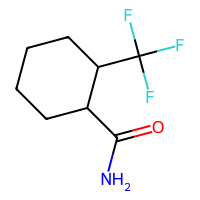
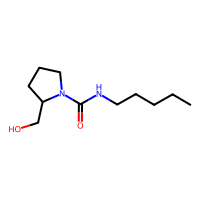
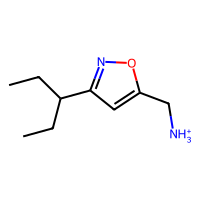
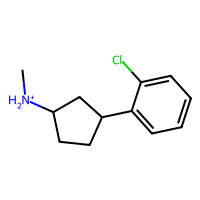
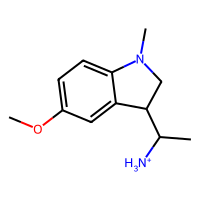
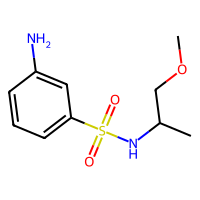
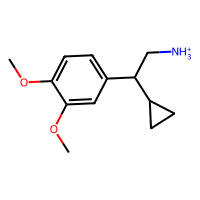
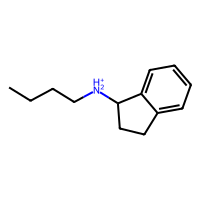
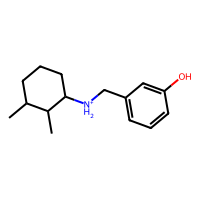
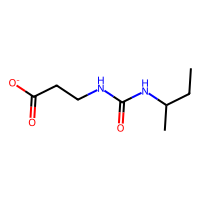

In [14]:
#conversion en dataframe
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

In [15]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [ ]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train